## Python Machine Learning - Code Examples
### Chapter 2 - Training Machine Learning Algorithms for Classification
The formal definition of an artificial neuron

In [2]:
import numpy as np

class Perceptron(object):
    """Perceptron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.

    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    errors_ : list
      Number of misclassifications (updates) in each epoch.

    """ 
    # 每一個類別都會 __init__ 預設方法 初始過程會被啟動
    def __init__(self, eta = 0.01, n_iter = 50, random_state = 1):
        self.eta = eta                    # 類別內部變數宣告self.XXX        >>學習率
        self.n_iter = n_iter              # 類別內部變數可以直接跨越方法存取 >>round整理計算
        self.random_state = random_state  #                               >>初始化權重
    
    # 這是類別提供的額外方法（函數）
    def fit(self, X, y):
        """Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
          Training vectors, where n_samples is the number of samples and
          n_features is the number of features.
        y : array-like, shape = [n_samples]
          Target values.

        Returns
        -------
        self : object

        """ 
        # 以下兩行是用來初始化權重
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc = 0.0, scale = 0.01, size = 1 + X.shape[1])
        self.errors_ = [] # 每一round = epoch所有數據的預測與真正錯誤次數
        
        # _ : 表示不重要變數 來代表跑幾次
        for _ in range(self.n_iter):
            errors = 0 # 每一round先將錯誤歸零
            for xi, target in zip(X, y): # 每一次每一筆資料
                update = self.eta * (target - self.predict(xi)) # xi :單筆所有欄位
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors) # 每一round所有錯誤
        return self

    def net_input(self, X): # 計算xi w乘積
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]
 
    def predict(self, X): # 判斷函數
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)

In [3]:
model = Perceptron()

In [4]:
from sklearn import datasets
iris = datasets.load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [5]:
# 僅取全部特徵的前一百筆數據，之後再取出前面兩個欄位，再顯示前三筆數據
iris['data'][:100][:, [0, 1]][:3]

array([[5.1, 3.5],
       [4.9, 3. ],
       [4.7, 3.2]])

In [6]:
import numpy as np
                        # numpy slicing
X, y = iris['data'][:100][:, [0, 1]], np.where(iris.get('target')[:100] == 0, -1, 1)
# 二分類：取前面一百筆，並且利用變更target從0, 1 --> -1, 1
X[:3], np.unique(y)

(array([[5.1, 3.5],
        [4.9, 3. ],
        [4.7, 3.2]]),
 array([-1,  1]))

In [7]:
model.fit(X, y)

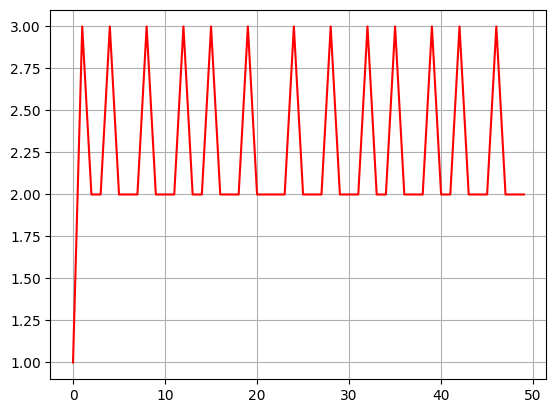

In [8]:
import matplotlib.pyplot as plt
plt.plot(model.errors_, color = 'red')
plt.grid()
plt.show() # 結果：無法收斂

In [9]:
# 模型資訊
model.w_

array([-0.22375655,  0.59788244, -0.76528172])

#### 調整參數訓練多次

In [10]:
import numpy as np

class Perceptron(object):
    """Perceptron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.

    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    errors_ : list
      Number of misclassifications (updates) in each epoch.

    """ 
    # 每一個類別都會 __init__ 預設方法 初始過程會被啟動
    def __init__(self, eta = 0.01, n_iter = 50, random_state = 1):
        self.eta = eta                    # 類別內部變數宣告self.XXX        >>學習率
        self.n_iter = n_iter              # 類別內部變數可以直接跨越方法存取 >>round整理計算
        self.random_state = random_state  #                               >>初始化權重
    
    # 這是類別提供的額外方法（函數）
    def fit(self, X, y):
        """Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
          Training vectors, where n_samples is the number of samples and
          n_features is the number of features.
        y : array-like, shape = [n_samples]
          Target values.

        Returns
        -------
        self : object

        """ 
        # 以下兩行是用來初始化權重
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc = 0.0, scale = 0.01, size = 1 + X.shape[1])
        self.errors_ = [] # 每一round = epoch所有數據的預測與真正錯誤次數
        
        # _ : 表示不重要變數 來代表跑幾次
        for _ in range(self.n_iter):
            errors = 0 # 每一round先將錯誤歸零
            for xi, target in zip(X, y): # 每一次每一筆資料
                update = self.eta * (target - self.predict(xi)) # xi :單筆所有欄位
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors) # 每一round所有錯誤
        return self

    def net_input(self, X): # 計算xi w乘積
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]
 
    def predict(self, X): # 判斷函數
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)

In [11]:
model = Perceptron(n_iter = 1000) # 強迫訓練收斂到global mininum

In [12]:
from sklearn import datasets
iris = datasets.load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [13]:
# 僅取全部特徵的前一百筆數據
iris['data'][:100]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [15]:
import numpy as np
                   # numpy slicing
X, y = iris['data'][:100][:, [0, 1]], np.where(iris.get('target')[:100] == 0, -1, 1)
# 二分類：取前面一百筆，並且利用變更target從0, 1 --> -1, 1
X[:3], np.unique(y)

(array([[5.1, 3.5],
        [4.9, 3. ],
        [4.7, 3.2]]),
 array([-1,  1]))

In [16]:
model.fit(X, y)

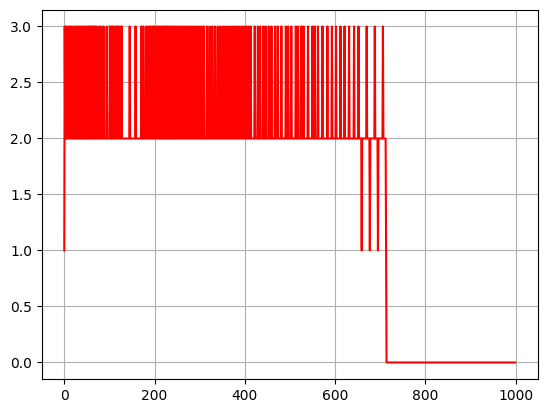

In [17]:
import matplotlib.pyplot as plt
plt.plot(model.errors_, color = 'red')
plt.grid()
plt.show()

#### 資料標準化

In [18]:
import numpy as np

class Perceptron(object):
    """Perceptron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.

    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    errors_ : list
      Number of misclassifications (updates) in each epoch.

    """ 
    # 每一個類別都會 __init__ 預設方法 初始過程會被啟動
    def __init__(self, eta = 0.01, n_iter = 50, random_state = 1):
        self.eta = eta                    # 類別內部變數宣告self.XXX        >>學習率
        self.n_iter = n_iter              # 類別內部變數可以直接跨越方法存取 >>round整理計算
        self.random_state = random_state  #                               >>初始化權重
    
    # 這是類別提供的額外方法（函數）
    def fit(self, X, y):
        """Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
          Training vectors, where n_samples is the number of samples and
          n_features is the number of features.
        y : array-like, shape = [n_samples]
          Target values.

        Returns
        -------
        self : object

        """ 
        # 以下兩行是用來初始化權重
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc = 0.0, scale = 0.01, size = 1 + X.shape[1])
        self.errors_ = [] # 每一round = epoch所有數據的預測與真正錯誤次數
        
        # _ : 表示不重要變數 來代表跑幾次
        for _ in range(self.n_iter):
            errors = 0 # 每一round先將錯誤歸零
            for xi, target in zip(X, y): # 每一次每一筆資料
                update = self.eta * (target - self.predict(xi)) # xi :單筆所有欄位
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors) # 每一round所有錯誤
        return self

    def net_input(self, X): # 計算xi w乘積
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]
 
    def predict(self, X): # 判斷函數
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)

In [19]:
model = Perceptron()

In [20]:
from sklearn import datasets
iris = datasets.load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [21]:
# 僅取全部特徵的前一百筆數據，之後再取出前面兩個欄位，再顯示前三筆數據
iris['data'][:100][:, [0, 1]][:3]

array([[5.1, 3.5],
       [4.9, 3. ],
       [4.7, 3.2]])

In [22]:
import numpy as np
                   # numpy slicing
X, y = iris['data'][:100][:, [0, 1]], np.where(iris.get('target')[:100] == 0, -1, 1)
# 二分類：取前面一百筆，並且利用變更target從0, 1 --> -1, 1
X[:3], np.unique(y)

(array([[5.1, 3.5],
        [4.9, 3. ],
        [4.7, 3.2]]),
 array([-1,  1]))

In [23]:
# z-score 標準化 每一筆數據 與 平均 之間的差異 為幾倍 標準差
X_ss = (X - np.mean(X, axis = 0)) / np.std(X, axis = 0)
X_ss[:3]

array([[-0.5810659 ,  0.84183714],
       [-0.89430898, -0.2078351 ],
       [-1.20755205,  0.21203379]])

In [24]:
# 使用sklearn 
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_sss = ss.fit_transform(X)
X_sss[:3]

array([[-0.5810659 ,  0.84183714],
       [-0.89430898, -0.2078351 ],
       [-1.20755205,  0.21203379]])

In [25]:
model.fit(X_ss, y)

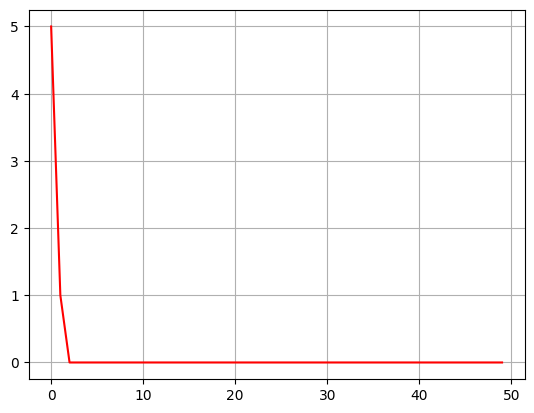

In [26]:
import matplotlib.pyplot as plt
plt.plot(model.errors_, color = 'red')
plt.grid()
plt.show()

#### Tensorflow_Iris

In [27]:
# 導入函式庫
import numpy as np  
import keras
# from keras.models import Sequential
from keras.datasets import mnist
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.utils import np_utils  # 用來後續將 label 標籤轉為 one-hot-encoding  
from matplotlib import pyplot as plt
import os
from datetime import datetime

# 載入iris資料庫的訓練資料，並自動分為『訓練組』及『測試組』
from sklearn import datasets
from sklearn.model_selection import train_test_split
iris = datasets.load_iris() # 辨識三個類別，四個特徵
X, y = iris['data'], iris.get('target')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 42)

In [28]:
X_train[0].shape

(4,)

In [29]:
# 建立簡單的線性執行的模型
model = keras.models.Sequential()
# Add Input layer, 隱藏層(hidden layer) 有 256個輸出變數
model.add(Dense(units = 256, input_dim = 4, kernel_initializer = 'normal', activation = 'relu')) 
# Add output layer 根據鳶尾花種類
model.add(Dense(units = 3, kernel_initializer = 'normal', activation = 'softmax'))

# 編譯：選擇損失函數、優化方法及成效衡量方式
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy']) 

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               1280      
                                                                 
 dense_1 (Dense)             (None, 3)                 771       
                                                                 
Total params: 2,051
Trainable params: 2,051
Non-trainable params: 0
_________________________________________________________________


In [31]:
y_test[:3],\
np_utils.to_categorical(y_test)[:3]

(array([1, 0, 2]),
 array([[0., 1., 0.],
        [1., 0., 0.],
        [0., 0., 1.]], dtype=float32))

In [32]:
# 將 training 的 label 進行 one-hot encoding
y_TrainOneHot = np_utils.to_categorical(y_train) 
y_TestOneHot = np_utils.to_categorical(y_test) 


# 將 training 的 input 資料轉為2維
X_train_2D = X_train.astype('float32')  
X_test_2D = X_test.astype('float32')  

x_Train_norm = ( X_train_2D - np.mean(X_train_2D, axis = 0) ) / np.std(X_train_2D, axis = 0) # 標準化就是0-1之間數字
x_Test_norm = ( X_test_2D - np.mean(X_test_2D, axis = 0) ) / np.std(X_test_2D, axis = 0)

# 進行訓練，訓練過程會存在train_history變數中callback
train_history = model.fit(x = x_Train_norm, y = y_TrainOneHot, 
                          # validation_split = 0.2, 
                          epochs = 10, 
                          batch_size = 2, 
                          verbose = 1,
                          validation_data = [x_Test_norm, y_TestOneHot],
                         )  

Epoch 1/10
68/68 [==============================] - 1s 6ms/step - loss: 0.7568 - accuracy: 0.7778 - val_loss: 0.5293 - val_accuracy: 0.7333
Epoch 2/10
68/68 [==============================] - 0s 3ms/step - loss: 0.4263 - accuracy: 0.8074 - val_loss: 0.3454 - val_accuracy: 0.8667
Epoch 3/10
68/68 [==============================] - 0s 3ms/step - loss: 0.3244 - accuracy: 0.8741 - val_loss: 0.2633 - val_accuracy: 0.8667
Epoch 4/10
68/68 [==============================] - 0s 3ms/step - loss: 0.2718 - accuracy: 0.8963 - val_loss: 0.2323 - val_accuracy: 0.8667
Epoch 5/10
68/68 [==============================] - 0s 4ms/step - loss: 0.2192 - accuracy: 0.9111 - val_loss: 0.2202 - val_accuracy: 0.8667
Epoch 6/10
68/68 [==============================] - 0s 4ms/step - loss: 0.1813 - accuracy: 0.9407 - val_loss: 0.2036 - val_accuracy: 0.8667
Epoch 7/10
68/68 [==============================] - 0s 3ms/step - loss: 0.1481 - accuracy: 0.9704 - val_loss: 0.1733 - val_accuracy: 0.9333
Epoch 8/10
68/68 [==

In [33]:
train_history.history.keys() # callback

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

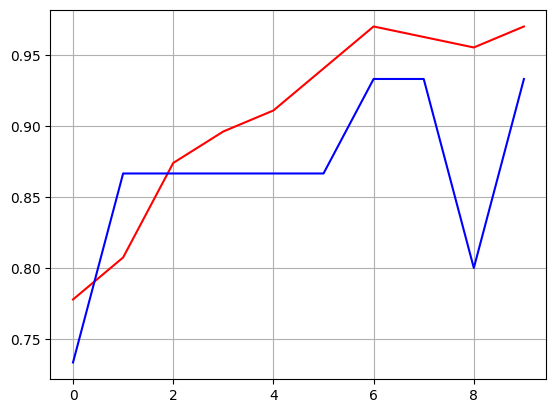

In [34]:
%matplotlib inline
# accuracy chart
import matplotlib.pyplot as plt
plt.plot(train_history.history['accuracy'], color = 'red')
plt.plot(train_history.history['val_accuracy'], color = 'blue')
plt.grid()
plt.show()

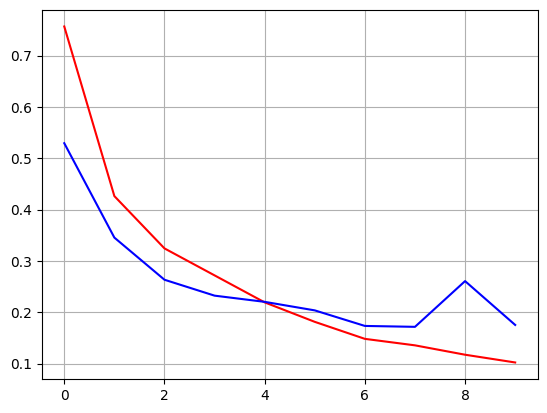

In [35]:
%matplotlib inline
# loss chart
import matplotlib.pyplot as plt
plt.plot(train_history.history['loss'], color = 'red')
plt.plot(train_history.history['val_loss'], color = 'blue')
plt.grid()
plt.show()

In [36]:
# 顯示訓練成果(分數)
scores = model.evaluate(x_Test_norm, y_TestOneHot)  
print("\t[Info] Accuracy of testing data = {:2.1f}%".format(scores[1] * 100.0))  
scores = model.evaluate(x_Train_norm, y_TrainOneHot)  
print("\t[Info] Accuracy of training data = {:2.1f}%".format(scores[1] * 100.0)) 

1/1 [==============================] - 0s 28ms/step - loss: 0.1753 - accuracy: 0.9333
	[Info] Accuracy of testing data = 93.3%
5/5 [==============================] - 0s 1ms/step - loss: 0.0899 - accuracy: 0.9704
	[Info] Accuracy of training data = 97.0%


In [37]:
# 預測(prediction)
X = x_Test_norm
predictions = np.argmax(model.predict(X), axis = 1) # np.argmax找出最佳的數字softmax
model.predict(X)[:3]

array([[1.9476397e-03, 8.4583306e-01, 1.5221924e-01],
       [9.9805617e-01, 1.9241548e-03, 1.9779678e-05],
       [3.8359120e-09, 2.4802974e-04, 9.9975199e-01]], dtype=float32)

In [38]:
# get prediction result
print('prediction:', predictions[0:20])
print('actual    :', y_test[0:20])

prediction: [1 0 2 1 1 0 1 2 2 1 2 0 0 0 0]
actual    : [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0]


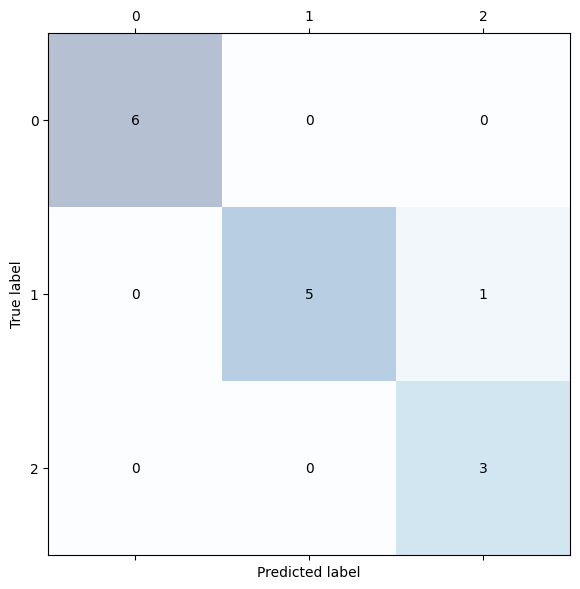

In [39]:
from sklearn.metrics import confusion_matrix
confmat = confusion_matrix(y_true = y_test, y_pred = predictions)

# draw confusion_matrix
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize = (6, 6))
ax.matshow(confmat, cmap = plt.cm.Blues, alpha = 0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x = j, y = i, s = confmat[i, j], va = 'center', ha = 'center')

plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.tight_layout()
#plt.savefig('images/06_09.png', dpi=300)
plt.show()

#### Tensorflow_Iris_LR

In [1]:
# 導入函式庫
import numpy as np  
import keras
# from keras.models import Sequential
from keras.datasets import mnist
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.utils import np_utils  # 用來後續將 label 標籤轉為 one-hot-encoding  
from matplotlib import pyplot as plt
import os
from datetime import datetime

# 載入iris資料庫的訓練資料，並自動分為『訓練組』及『測試組』
from sklearn import datasets
from sklearn.model_selection import train_test_split
iris = datasets.load_iris() # 辨識三個類別，四個特徵
X, y = iris['data'], iris.get('target')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 42)

In [2]:
# 建立簡單的線性執行的模型
model = keras.models.Sequential()
# Add Input layer, 隱藏層(hidden layer) 有 256個輸出變數
model.add(Dense(units = 256, input_dim = 4, kernel_initializer = 'normal', activation = 'relu')) 
# Add output layer 根據鳶尾花種類
model.add(Dense(units = 3, kernel_initializer = 'normal', activation = 'softmax'))

from tensorflow import keras as tk
opt = tk.optimizers.Adam(learning_rate = 0.01)

# 編譯: 選擇損失函數、優化方法及成效衡量方式
model.compile(loss = 'categorical_crossentropy', optimizer = opt, metrics = ['accuracy']) 

In [3]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               1280      
                                                                 
 dense_1 (Dense)             (None, 3)                 771       
                                                                 
Total params: 2,051
Trainable params: 2,051
Non-trainable params: 0
_________________________________________________________________


In [4]:
y_test[:3],\
np_utils.to_categorical(y_test)[:3]

(array([1, 0, 2]),
 array([[0., 1., 0.],
        [1., 0., 0.],
        [0., 0., 1.]], dtype=float32))

In [5]:
# 將 training 的 label 進行 one-hot encoding
y_TrainOneHot = np_utils.to_categorical(y_train) 
y_TestOneHot = np_utils.to_categorical(y_test) 


# 將 training 的 input 資料轉為2維
X_train_2D = X_train.astype('float32')  
X_test_2D = X_test.astype('float32')  

x_Train_norm =( X_train_2D - np.mean(X_train_2D, axis = 0) ) / np.std(X_train_2D, axis = 0) # 標準化就是0-1之間數字
x_Test_norm = ( X_test_2D - np.mean(X_test_2D, axis = 0) ) / np.std(X_test_2D, axis = 0)

# 進行訓練，訓練過程會存在train_history變數中callback
train_history = model.fit(x = x_Train_norm, y = y_TrainOneHot, 
                          #validation_split = 0.2, 
                          epochs = 10, 
                          batch_size = 2, 
                          verbose = 1,
                          validation_data = [x_Test_norm, y_TestOneHot],
                          )  

Epoch 1/10
68/68 [==============================] - 1s 6ms/step - loss: 0.4100 - accuracy: 0.8148 - val_loss: 0.3258 - val_accuracy: 0.8000
Epoch 2/10
68/68 [==============================] - 0s 3ms/step - loss: 0.1576 - accuracy: 0.9333 - val_loss: 0.5984 - val_accuracy: 0.8000
Epoch 3/10
68/68 [==============================] - 0s 4ms/step - loss: 0.1381 - accuracy: 0.9407 - val_loss: 0.4652 - val_accuracy: 0.8000
Epoch 4/10
68/68 [==============================] - 0s 4ms/step - loss: 0.1943 - accuracy: 0.9185 - val_loss: 0.5170 - val_accuracy: 0.8000
Epoch 5/10
68/68 [==============================] - 0s 3ms/step - loss: 0.0796 - accuracy: 0.9630 - val_loss: 0.1573 - val_accuracy: 0.9333
Epoch 6/10
68/68 [==============================] - 0s 4ms/step - loss: 0.1107 - accuracy: 0.9630 - val_loss: 0.4118 - val_accuracy: 0.8667
Epoch 7/10
68/68 [==============================] - 0s 3ms/step - loss: 0.0983 - accuracy: 0.9481 - val_loss: 0.6002 - val_accuracy: 0.8000
Epoch 8/10
68/68 [==

In [6]:
train_history.history.keys() # callback

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

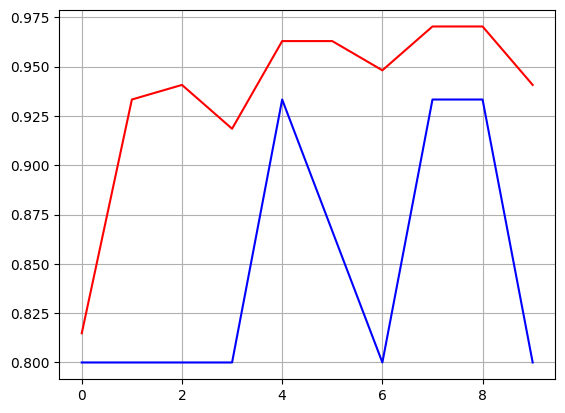

In [7]:
%matplotlib inline
# accuracy chart
import matplotlib.pyplot as plt
plt.plot(train_history.history['accuracy'], color = 'red')
plt.plot(train_history.history['val_accuracy'], color = 'blue')
plt.grid()
plt.show()

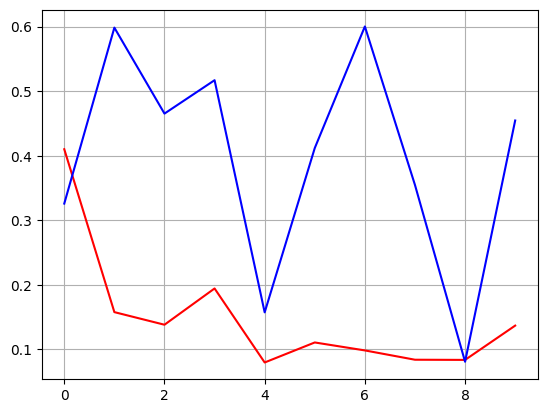

In [8]:
%matplotlib inline
# loss chart
import matplotlib.pyplot as plt
plt.plot(train_history.history['loss'], color = 'red')
plt.plot(train_history.history['val_loss'], color= 'blue')
plt.grid()
plt.show()

In [9]:
# 顯示訓練成果(分數)
scores = model.evaluate(x_Test_norm, y_TestOneHot)  
print("\t[Info] Accuracy of testing data = {:2.1f}%".format(scores[1] * 100.0))  
scores = model.evaluate(x_Train_norm, y_TrainOneHot)
print("\t[Info] Accuracy of training data = {:2.1f}%".format(scores[1] * 100.0))  

1/1 [==============================] - 0s 25ms/step - loss: 0.4545 - accuracy: 0.8000
	[Info] Accuracy of testing data = 80.0%
5/5 [==============================] - 0s 1ms/step - loss: 0.0679 - accuracy: 0.9704
	[Info] Accuracy of training data = 97.0%


In [10]:
# 預測(prediction)
X = x_Test_norm
predictions = np.argmax(model.predict(X), axis = 1) # np.argmax找出最佳的數字softmax
model.predict(X)[:3]

array([[2.3087906e-03, 7.5763398e-01, 2.4005730e-01],
       [1.0000000e+00, 6.5348851e-16, 2.5728367e-19],
       [8.4368598e-15, 1.4419227e-07, 9.9999988e-01]], dtype=float32)

In [11]:
# get prediction result
print('prediction:', predictions[0:20])
print('actual    :', y_test[0:20])

prediction: [1 0 2 2 2 0 1 2 2 1 2 0 0 0 0]
actual    : [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0]


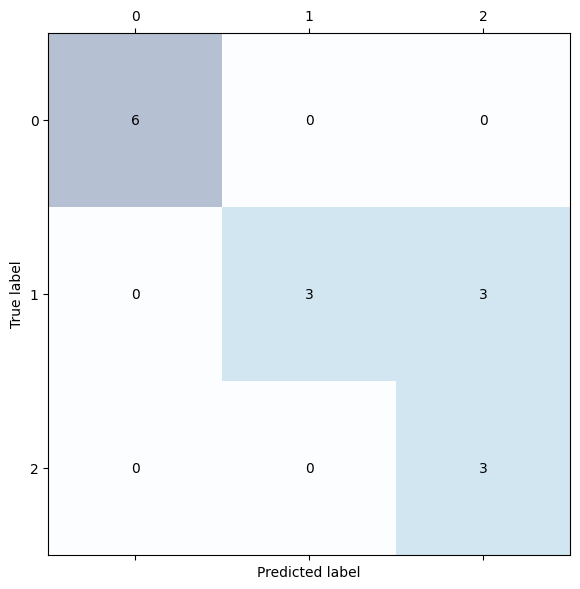

In [12]:
from sklearn.metrics import confusion_matrix
confmat = confusion_matrix(y_true = y_test, y_pred = predictions)

# draw confusion_matrix
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize = (6, 6))
ax.matshow(confmat, cmap = plt.cm.Blues, alpha = 0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x = j, y = i, s = confmat[i, j], va = 'center', ha = 'center')

plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.tight_layout()
#plt.savefig('images/06_09.png', dpi=300)
plt.show()